In [119]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1. Create two 2D arrays representing coordinates x, y on the cartesian plan

In [122]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
xx, yy = np.meshgrid(x, y)

## 1.2. Visualize each 2D array using pcolormesh

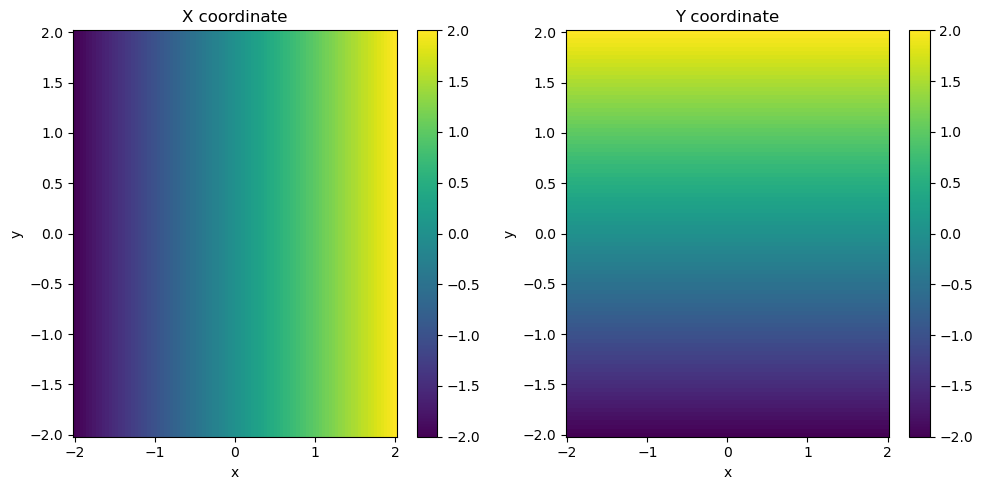

In [123]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pcolormesh(x, y, xx, cmap='viridis')
plt.colorbar()
plt.title('X coordinate')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.pcolormesh(x, y, yy, cmap='viridis')
plt.colorbar()
plt.title('Y coordinate')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## 1.3 From your cartesian coordinates, create polar coordinates r and \phi

In [124]:
# Convert to polar coordinates
r = np.sqrt(xx**2 + yy**2)
phi = np.arctan2(yy, xx)

## 1.4. Visualize r and phi on the 2D x/y plane using pcolormesh

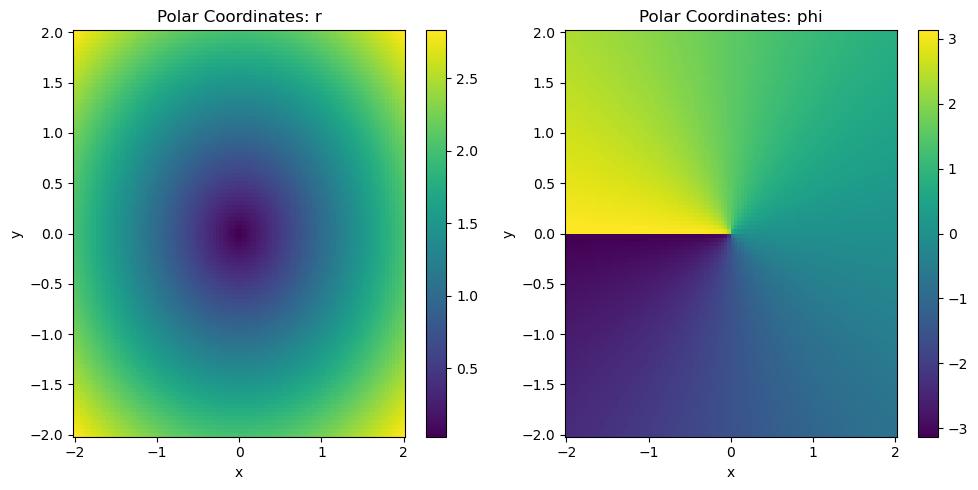

In [125]:
# Visualize r
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pcolormesh(xx, yy, r, cmap='viridis')
plt.colorbar()
plt.title('Polar Coordinates: r')
plt.xlabel('x')
plt.ylabel('y')

# Visualize phi
plt.subplot(1, 2, 2)
plt.pcolormesh(xx, yy, phi, cmap='viridis')
plt.colorbar()
plt.title('Polar Coordinates: phi')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

## 1.5 Caclulate the quanity f and plot

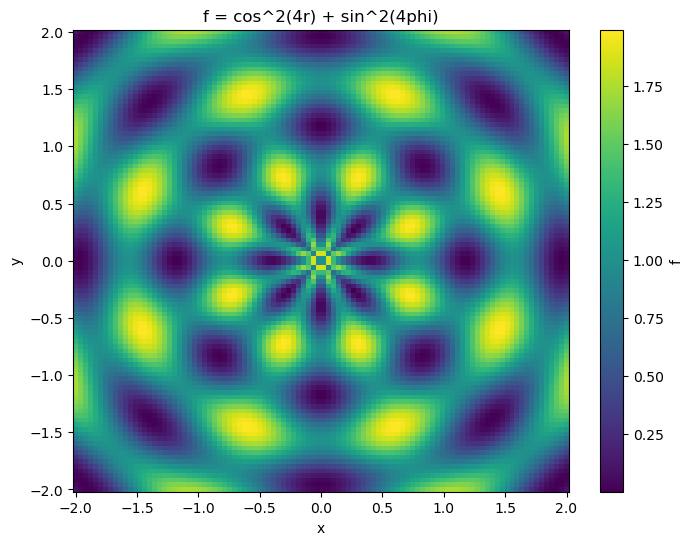

In [126]:
# Calculate the quantity f
f = np.cos(4*r)**2 + np.sin(4*phi)**2

# Plot f on the x-y plane
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, f, cmap='viridis')
plt.colorbar(label='f')
plt.title('f = cos^2(4r) + sin^2(4phi)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.6 Plot the mean of f with respect to the x axis as a function of y

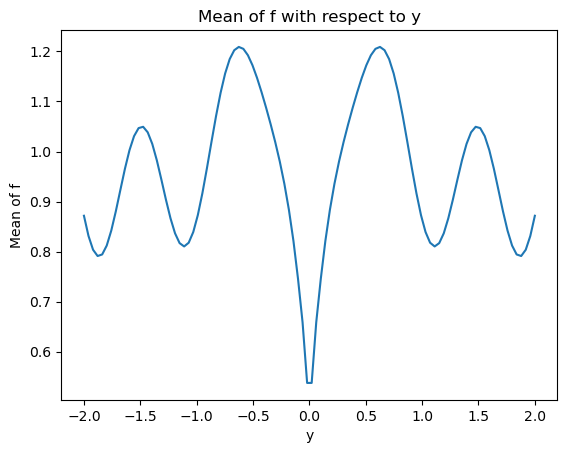

In [127]:
# Calculate the mean of f along the x-axis for each y
mean_f_x = np.mean(f, axis=1)

# Plot the mean of f with respect to the x-axis as a function of y
plt.plot(y, mean_f_x)
plt.title('Mean of f with respect to y')
plt.xlabel('y')
plt.ylabel('Mean of f')
plt.show()

## 1.7 Plot the mean of f with respect to the y axis as a function of x

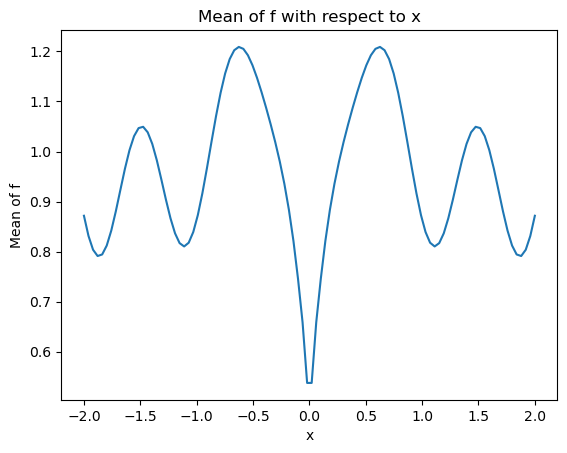

In [129]:
# Calculate the mean of f along the y-axis for each x
mean_f_y = np.mean(f, axis=0)

# Plot the mean of f with respect to the y-axis as a function of x
plt.plot(x, mean_f_y)
plt.title('Mean of f with respect to x')
plt.xlabel('x')
plt.ylabel('Mean of f')
plt.show()

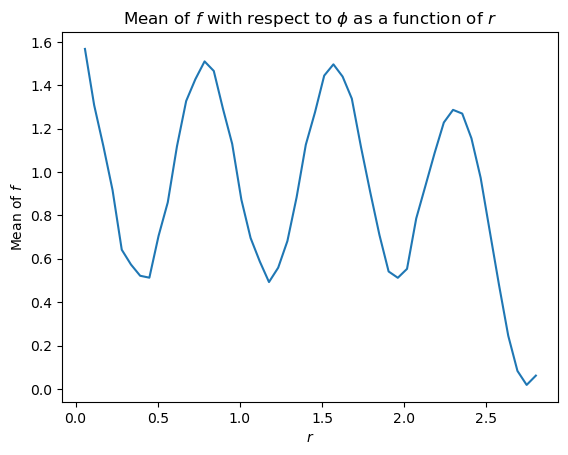

In [130]:
from scipy import stats

r_flat = r.flatten()
f_flat = f.flatten()

bin_means, bin_edges, binnumber = stats.binned_statistic(r_flat, f_flat, statistic='mean', bins=50)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Plot
plt.plot(bin_centers, bin_means)
plt.xlabel('$r$')
plt.ylabel('Mean of $f$')
plt.title('Mean of $f$ with respect to $\phi$ as a function of $r$')

plt.show()

# Part 2: Analyze ARGO Data

In [131]:
import pooch
url = "https://www.ldeo.columbia.edu/~rpa/float_data_4901412.zip"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash="2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009")
files

['/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy',
 '/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy']

## 2.1 Load each data file as a numpy array.

In [132]:
date = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/date.npy')
T = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/T.npy')
S = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/S.npy')
P = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/P.npy')
level = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/levels.npy')
lon = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lon.npy')
lat = np.load('/home/yw4236/.cache/pooch/7e6685dbe2a3c0b0870f770f3ef413d9-float_data_4901412.zip.unzip/float_data/lat.npy')

## 2.2 Examine the shapes of T, S and P compared to lon, lat, date and level. How do you think they are related?
### Based on the shapes, which dimensions do you think are shared among the arrays?

In [133]:
print('Shape of T is', T.shape,
      'Shape of S is', S.shape,
      'Shape of P is', P.shape,
      'Shape of lon is', lon.shape,
      'Shape of lat is', lat.shape,
      'Shape of date is', date.shape,
      'Shape of level is', level.shape)


Shape of T is (78, 75) Shape of S is (78, 75) Shape of P is (78, 75) Shape of lon is (75,) Shape of lat is (75,) Shape of date is (75,) Shape of level is (78,)


### The shapes of the arrays indicate that `T`, `S`, and `P` are all two-dimensional arrays with dimensions (78, 75), while `lon`, `lat`, and `date` are one-dimensional arrays with a shape of (75,), `level` is also one-dimensional with shape (78,). The first dimension of `T`, `S`, and `P` corresponds to the data represented by `level`, while the second dimension corresponds to the data represented by `lon`, `lat`, and `date`.

## 2.3 Make a plot for each column of data in T, S and P (three plots)

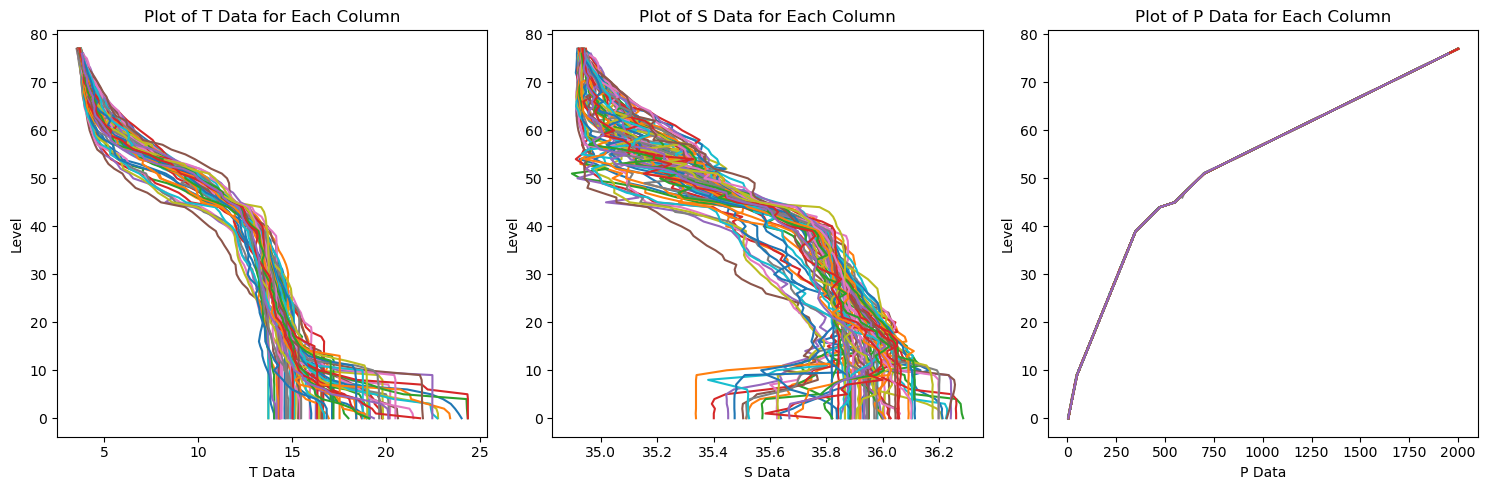

In [134]:
# Create subplots with a horizontal arrangement
plt.figure(figsize=(15, 5))

# Plot for T
plt.subplot(1, 3, 1)
for i in range(T.shape[1]):
    plt.plot(T[:, i], level)
plt.xlabel('T Data')
plt.ylabel('Level')
plt.title('Plot of T Data for Each Column')

# Plot for S
plt.subplot(1, 3, 2)
for i in range(S.shape[1]):
    plt.plot(S[:, i], level)
plt.xlabel('S Data')
plt.ylabel('Level')
plt.title('Plot of S Data for Each Column')

# Plot for P
plt.subplot(1, 3, 3)
for i in range(P.shape[1]):
    plt.plot(P[:, i], level)
plt.xlabel('P Data')
plt.ylabel('Level')
plt.title('Plot of P Data for Each Column')

plt.tight_layout()
plt.show()

## 2.4 Compute the mean and standard deviation of each of T, S and P at each depth in level.

In [135]:
mean_T = np.mean(T,axis=1)
std_T = np.std(T,axis=1)

mean_S = np.mean(S,axis=1)
std_S = np.std(S,axis=1)

mean_P = np.mean(P,axis=1)
std_P = np.std(P,axis=1)

In [136]:
print('Mean of T at each depth in level:' , mean_T)
print('Standard deviation of T at each depth in level:' , std_T)
print('Mean of S at each depth in level:' , mean_S)
print('Standard deviation of S at each depth in level:' , std_S)
print('Mean of P at each depth in level:' , mean_P)
print('Standard deviation of P at each depth in level:' , std_P)

Mean of T at each depth in level: [        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan 10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333         nan         nan         nan
         nan         nan         nan         nan         nan         nan]
Standard deviation 

## 2.5 Now make three similar plot, but show only the mean T, S and P at each depth. Show error bars on each plot using the standard deviations.

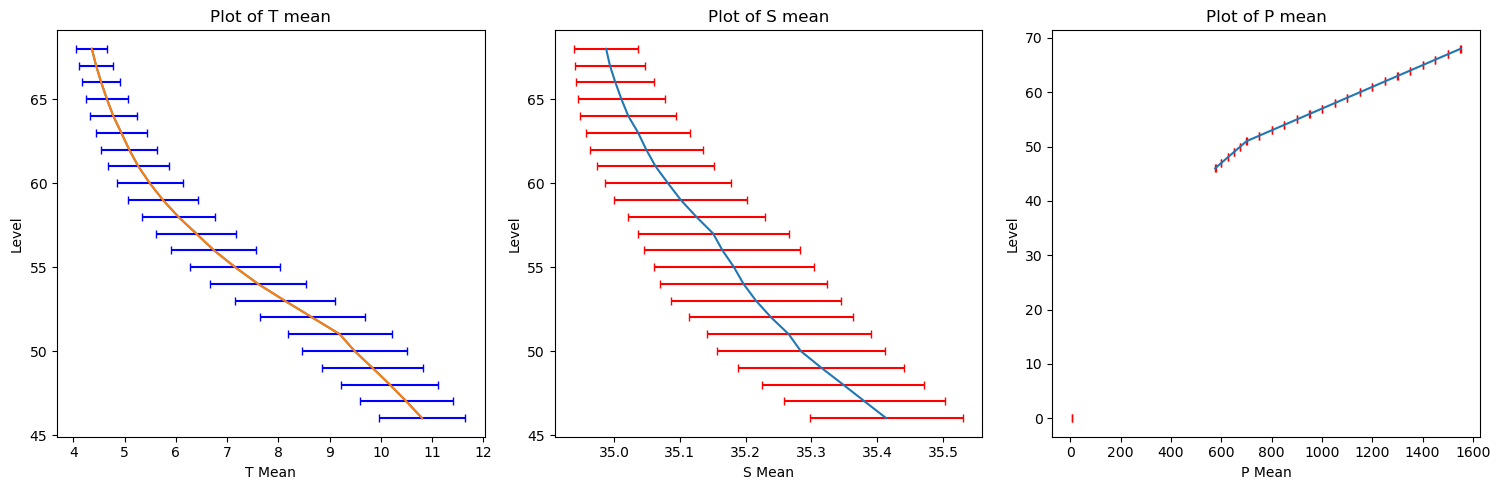

In [137]:
# Create subplots with a horizontal arrangement
plt.figure(figsize=(15, 5))

# Plot for T
plt.subplot(1, 3, 1)
plt.plot(mean_T, level)
plt.errorbar(mean_T, level, xerr=std_T, ecolor='b',capsize=3)
plt.xlabel('T Mean')
plt.ylabel('Level')
plt.title('Plot of T mean')

# Plot for S
plt.subplot(1, 3, 2)
plt.errorbar(mean_S, level, xerr=std_S, ecolor='r',capsize=3)
plt.xlabel('S Mean')
plt.ylabel('Level')
plt.title('Plot of S mean')

# Plot for P
plt.subplot(1, 3, 3)
plt.errorbar(mean_P, level, xerr=std_P, ecolor='r',capsize=3)
plt.xlabel('P Mean')
plt.ylabel('Level')
plt.title('Plot of P mean')

plt.tight_layout()
plt.show()

## 2.6 Account For Missing Data

In [138]:
mean_T = np.nanmean(T,axis=1)
std_T = np.nanstd(T,axis=1)

mean_S = np.nanmean(S,axis=1)
std_S = np.nanstd(S,axis=1)

mean_P = np.nanmean(P,axis=1)
std_P = np.nanstd(P,axis=1)

In [139]:
print('Mean of T at each depth in level:' , mean_T)
print('Standard deviation of T at each depth in level:' , std_T)
print('Mean of S at each depth in level:' , mean_S)
print('Standard deviation of S at each depth in level:' , std_S)
print('Mean of P at each depth in level:' , mean_P)
print('Standard deviation of P at each depth in level:' , std_P)

Mean of T at each depth in level: [17.60172602 17.57223609 17.5145833  17.42326395 17.24943838 17.03730134
 16.76787661 16.44609588 16.17439195 16.04501356 15.65827023 15.4607296
 15.26114862 15.12489191 14.99133783 14.90160808 14.81990544 14.74535139
 14.66822971 14.585027   14.49732434 14.41904053 14.35412163 14.27102702
 14.19081082 14.11487838 14.04347293 13.98067566 13.90994595 13.83274319
 13.76139196 13.69836479 13.62335132 13.54185131 13.46647295 13.39395946
 13.32541891 13.25205403 13.18131082 13.10233782 12.89268916 12.67795943
 12.4649189  12.2178513  11.98270268 11.1281081  10.80430666 10.49702667
 10.1749066   9.83453334  9.48625332  9.19793334  8.66010666  8.12324001
  7.60221333  7.15289333  6.74250667  6.39543999  6.04598667  5.74538665
  5.48913333  5.26604001  5.08768     4.93479998  4.77769334  4.65368
  4.54237334  4.44274664  4.35933333  4.2653784   4.17290539  4.08902703
  3.99864865  3.92163514  3.85617567  3.78916217  3.72950001  3.66207691]
Standard deviation o

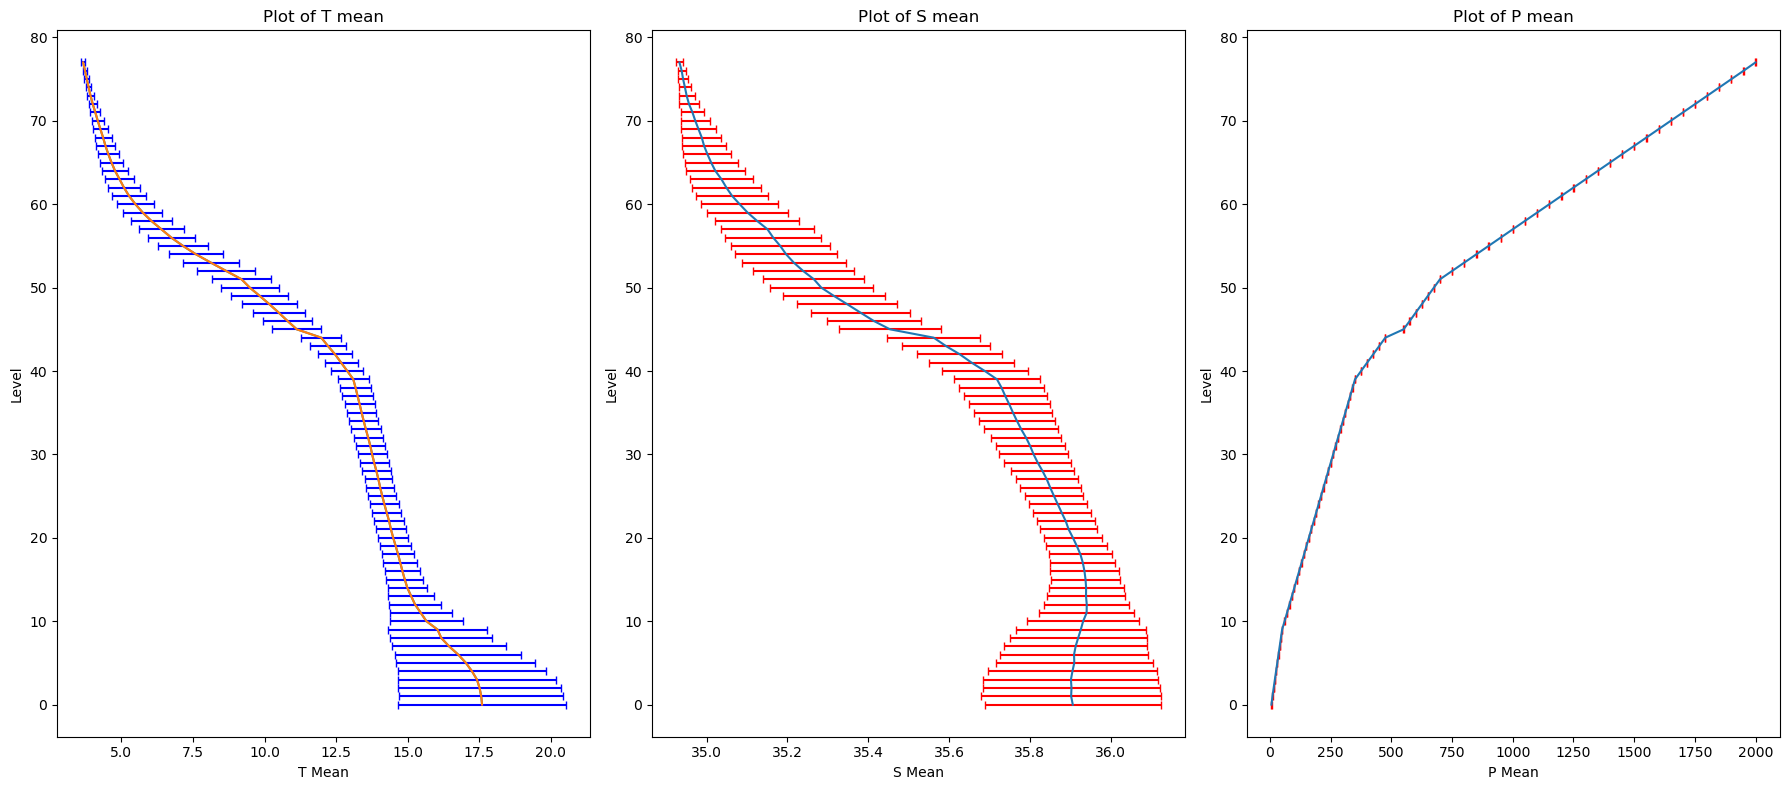

In [140]:
# Create subplots with a horizontal arrangement
plt.figure(figsize=(18, 8))

# Plot for T
plt.subplot(1, 3, 1)
plt.plot(mean_T, level)
plt.errorbar(mean_T, level, xerr=std_T, ecolor='b',capsize=3)
plt.xlabel('T Mean')
plt.ylabel('Level')
plt.title('Plot of T mean')

# Plot for S
plt.subplot(1, 3, 2)
plt.errorbar(mean_S, level, xerr=std_S, ecolor='r',capsize=3)
plt.xlabel('S Mean')
plt.ylabel('Level')
plt.title('Plot of S mean')

# Plot for P
plt.subplot(1, 3, 3)
plt.errorbar(mean_P,level, xerr=std_P, ecolor='r',capsize=3)
plt.xlabel('P Mean')
plt.ylabel('Level')
plt.title('Plot of P mean')

plt.tight_layout()
plt.show()

## 2.7 Create a scatter plot of the lon, lat positions of the ARGO float

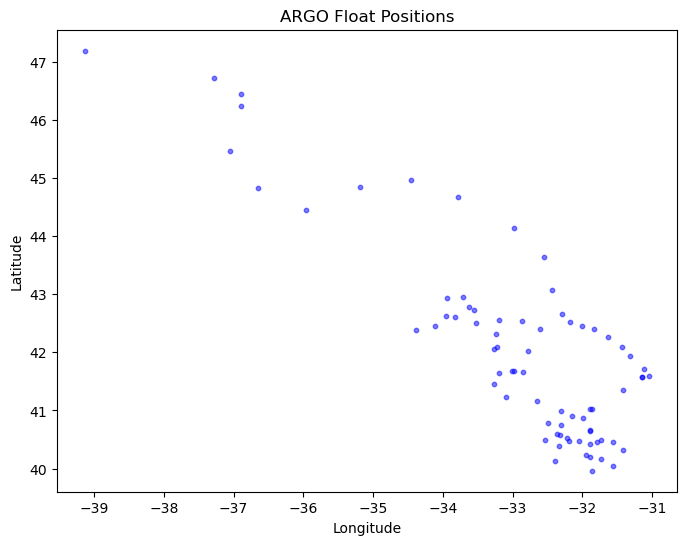

In [142]:
# Create scatter plot
plt.figure(figsize=(8, 6))  
plt.scatter(lon, lat, s=10, c='b', marker='o', alpha=0.5)  
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('ARGO Float Positions') 
plt.show()